In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/duo/Projects/proyecto-computacion-I/data/datasets/Metricas_limpias.csv")

In [14]:
df.columns

Index(['timestamp', 'value', 'sensor_id', 'metric', 'unit', 'batch',
       'trans_value', 'z_score_abs'],
      dtype='object')

In [4]:
df.head()

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
0,2025-10-02T14:00:00.000000000Z,7.400000,C323,PH,ph,batch1,7.400000,4.440892e-09
1,2025-10-02T14:00:00.000000000Z,0.095310,C322,AMONIO,ppm,batch1,0.095310,1.774644e+00
2,2025-10-02T14:00:00.000000000Z,1.163151,C342,CLOROFILA,µg/l,batch1,1.163151,6.388911e-01
3,2025-10-02T14:00:00.000000000Z,1.064711,C323,CARBONO ORGANICO,ppm,batch1,1.064711,1.691932e+00
4,2025-10-02T14:00:00.000000000Z,2.610070,C313,CLOROFILA,ppb,batch1,2.610070,3.181695e+00


In [41]:
df_desnormalizado = df.pivot_table(
    index=['timestamp', 'sensor_id', 'batch'], # Las claves que se mantienen fijas
    columns=['metric'],                # Las que se convierten en columnas
    values='value',                            # El dato que quieres ver
    aggfunc='first'                            # Si no hay duplicados, 'first' basta
)

In [43]:
df_desnormalizado.describe()

metric,AMONIO,CARBONO ORGANICO,CLOROFILA,CONDUCTIVIDAD,FICOCIANINAS,FOSFATOS,NITRATOS,NIVEL,OXIGENO DISUELTO,PH,TEMPERATURA,TURBIDEZ
count,21781.000000,17937.000000,10253.000000,37157.000000,10253.000000,7686.000000,7686.000000,16655.000000,37157.000000,37157.000000,38439.000000,35876.000000
mean,0.886934,2.003677,2.054336,5.735650,1.241268,0.394187,1.631896,0.759090,7.185815,6.886506,12.587736,2.111962
std,1.056485,0.852346,1.461553,2.021275,2.338311,0.328127,2.439010,1.005646,3.388065,2.517176,5.953353,1.301202
min,0.000000,0.000000,0.000000,0.000000,-0.223144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048790,1.629241,0.832909,5.043425,0.000000,0.000000,0.000000,0.000000,5.090000,7.200000,9.200000,1.098612
50%,0.392042,1.945910,2.116256,6.565265,0.182322,0.512824,0.000000,0.410000,8.240000,7.700000,12.200000,2.302585
75%,1.350667,2.529721,2.965273,7.084612,0.832909,0.672944,3.552702,1.020000,9.900000,8.100000,16.400000,2.890372
max,4.875197,5.295614,5.283711,8.006701,8.597482,2.988708,6.255750,3.730000,13.470000,14.000000,50.000000,8.517393


In [18]:
df

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
0,2025-10-02 14:00:00+00:00,7.400000,C323,PH,ph,batch1,7.400000,4.440892e-09
1,2025-10-02 14:00:00+00:00,0.095310,C322,AMONIO,ppm,batch1,0.095310,1.774644e+00
2,2025-10-02 14:00:00+00:00,1.163151,C342,CLOROFILA,µg/l,batch1,1.163151,6.388911e-01
3,2025-10-02 14:00:00+00:00,1.064711,C323,CARBONO ORGANICO,ppm,batch1,1.064711,1.691932e+00
4,2025-10-02 14:00:00+00:00,2.610070,C313,CLOROFILA,ppb,batch1,2.610070,3.181695e+00
...,...,...,...,...,...,...,...,...
278032,2025-12-19 19:00:00+00:00,12.000000,C314,TEMPERATURA,ºC,batch9,12.000000,9.195018e-01
278033,2025-12-19 19:00:00+00:00,0.000000,C308,AMONIO,mg/l,batch9,0.000000,0.000000e+00
278034,2025-12-19 19:00:00+00:00,8.400000,C329,PH,ph,batch9,8.400000,6.869899e-01
278035,2025-12-19 19:00:00+00:00,0.741937,C304,FOSFATOS,ppm,batch9,0.741937,5.747907e-01


In [65]:
def pintar_graficas(df_input):
    # Evitar modificar el dataframe original fuera de la función
    df = df_input.copy()

    if df.empty:
        print("El DataFrame pasado está vacío.")
        return

    df['timestamp'] = pd.to_datetime(df['timestamp'])

    sns.set_theme(style="whitegrid", palette="muted")
    metrics = df['metric'].unique()

    for metric in metrics:
        subset = df[df['metric'] == metric]

        if len(subset) < 10:
            print(f"Métrica '{metric}' ignorada: muy pocos datos ({len(subset)}).")
            continue

        plt.figure(figsize=(10, 6))

        sns.lineplot(data=subset, x="timestamp", y="value", hue="sensor_id", marker='o')

        plt.title(f"Métrica: {metric}")
        plt.xlabel("Fecha")
        plt.ylabel("Valor")
        plt.xticks(rotation=45)

        # --- AQUÍ ESTÁ EL CAMBIO ---
        if metric == 'TEMPERATURA':
            # 1. Calculamos la media de los datos actuales para saber dónde centrar la cámara
            media = subset['value'].mean()

            # 2. Definimos los límites: 2.5 abajo y 2.5 arriba de la media
            # Esto fuerza que la altura total del gráfico sea siempre de 5 grados
            plt.ylim(media - 2.5, media + 2.5)
        # ---------------------------

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

In [27]:
df.head()

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
0,2025-10-02 14:00:00+00:00,7.400000,C323,PH,ph,batch1,7.400000,4.440892e-09
1,2025-10-02 14:00:00+00:00,0.095310,C322,AMONIO,ppm,batch1,0.095310,1.774644e+00
2,2025-10-02 14:00:00+00:00,1.163151,C342,CLOROFILA,µg/l,batch1,1.163151,6.388911e-01
3,2025-10-02 14:00:00+00:00,1.064711,C323,CARBONO ORGANICO,ppm,batch1,1.064711,1.691932e+00
4,2025-10-02 14:00:00+00:00,2.610070,C313,CLOROFILA,ppb,batch1,2.610070,3.181695e+00


In [28]:
df[df['batch'] == 'batch1'].head(5)

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
0,2025-10-02 14:00:00+00:00,7.400000,C323,PH,ph,batch1,7.400000,4.440892e-09
1,2025-10-02 14:00:00+00:00,0.095310,C322,AMONIO,ppm,batch1,0.095310,1.774644e+00
2,2025-10-02 14:00:00+00:00,1.163151,C342,CLOROFILA,µg/l,batch1,1.163151,6.388911e-01
3,2025-10-02 14:00:00+00:00,1.064711,C323,CARBONO ORGANICO,ppm,batch1,1.064711,1.691932e+00
4,2025-10-02 14:00:00+00:00,2.610070,C313,CLOROFILA,ppb,batch1,2.610070,3.181695e+00


In [29]:
df[df['batch'] == 'batch10'].head(5)

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
52140,2026-01-03 19:00:00+00:00,7.800000,C323,PH,ph,batch10,7.800000,0.241269
52141,2026-01-03 19:00:00+00:00,0.009950,C322,AMONIO,ppm,batch10,0.009950,0.165458
52142,2026-01-03 19:00:00+00:00,4.784989,C342,CLOROFILA,µg/l,batch10,4.784989,0.730204
52143,2026-01-03 19:00:00+00:00,5.908083,C303,CONDUCTIVIDAD,micrS/cm,batch10,5.908083,0.769573
52144,2026-01-03 19:00:00+00:00,0.262364,C307,AMONIO,mg/l,batch10,0.262364,0.313292


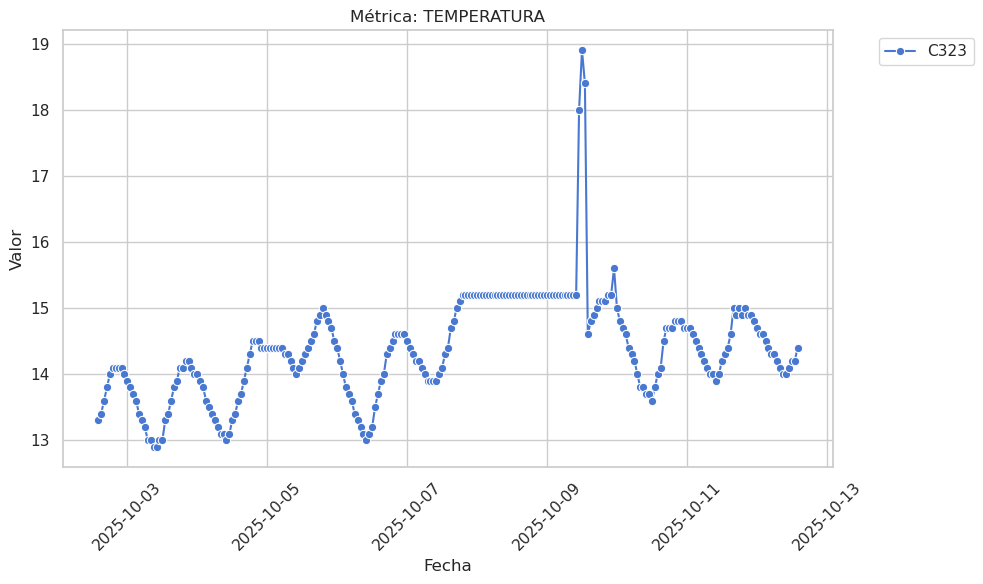


--- Gráficas del Batch 10 ---


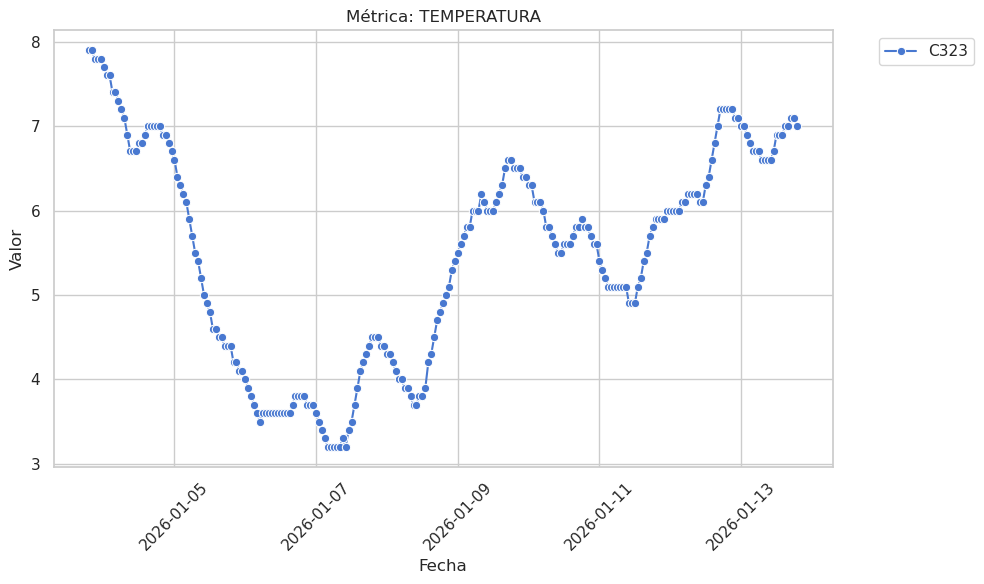

In [54]:
pintar_graficas(df[(df['batch'] == 'batch1') & (df['sensor_id'] == 'C323') & (df['metric'] == 'TEMPERATURA')])

print("\n--- Gráficas del Batch 10 ---")
pintar_graficas(df[(df['batch'] == 'batch10') & (df['sensor_id'] == 'C323') & (df['metric'] == 'TEMPERATURA')])

In [ ]:
pintar_graficas(df[(df['batch'] == 'batch1') & (df['sensor_id'] == 'C323') & (df['metric'] == 'TEMPERATURA')])

print("\n--- Gráficas del Batch 10 ---")
pintar_graficas(df[(df['batch'] == 'batch10') & (df['sensor_id'] == 'C323') & (df['metric'] == 'TEMPERATURA')])

In [37]:
df[df['batch'] == 'batch1'].describe()

,value,trans_value,z_score_abs
count,52140.000000,52140.000000,52140.000000
mean,5.672511,5.672511,0.596663
std,6.089536,6.089536,0.596396
min,-0.105361,-0.105361,0.000000
25%,0.832909,0.832909,0.132655
50%,3.681477,3.681477,0.477876
75%,7.900000,7.900000,0.886468
max,30.600000,30.600000,9.695611


In [57]:
df.head()

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
0,2025-10-02 14:00:00+00:00,7.400000,C323,PH,ph,batch1,7.400000,4.440892e-09
1,2025-10-02 14:00:00+00:00,0.095310,C322,AMONIO,ppm,batch1,0.095310,1.774644e+00
2,2025-10-02 14:00:00+00:00,1.163151,C342,CLOROFILA,µg/l,batch1,1.163151,6.388911e-01
3,2025-10-02 14:00:00+00:00,1.064711,C323,CARBONO ORGANICO,ppm,batch1,1.064711,1.691932e+00
4,2025-10-02 14:00:00+00:00,2.610070,C313,CLOROFILA,ppb,batch1,2.610070,3.181695e+00


In [59]:
indices_a_borrar = df[ (df['metric'] == 'TEMPERATURA') & (df['value'] < 19) & (df['sensor_id'] == 'C344') ].index

df = df.drop(indices_a_borrar)

In [61]:
df['sensor_id'].unique()

array(['C323', 'C322', 'C342', 'C313', 'C326', 'C331', 'C317', 'C343',
       'C345', 'C306', 'C303', 'C307', 'C310', 'C330', 'C333', 'C327',
       'C321', 'C325', 'C328', 'C315', 'C316', 'C329', 'C302', 'C344',
       'C314', 'C312', 'C304', 'C309', 'C308', 'C320'], dtype=object)

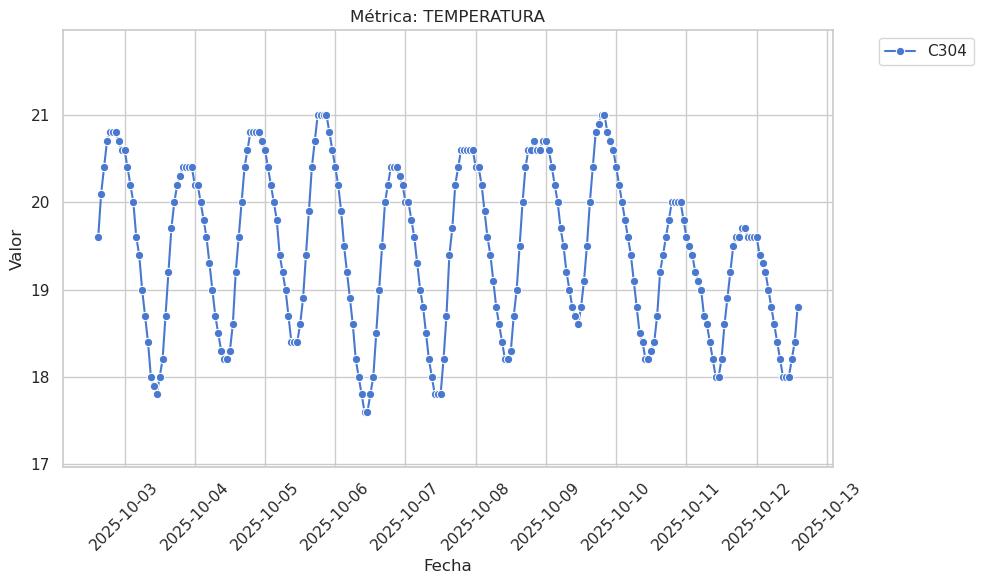

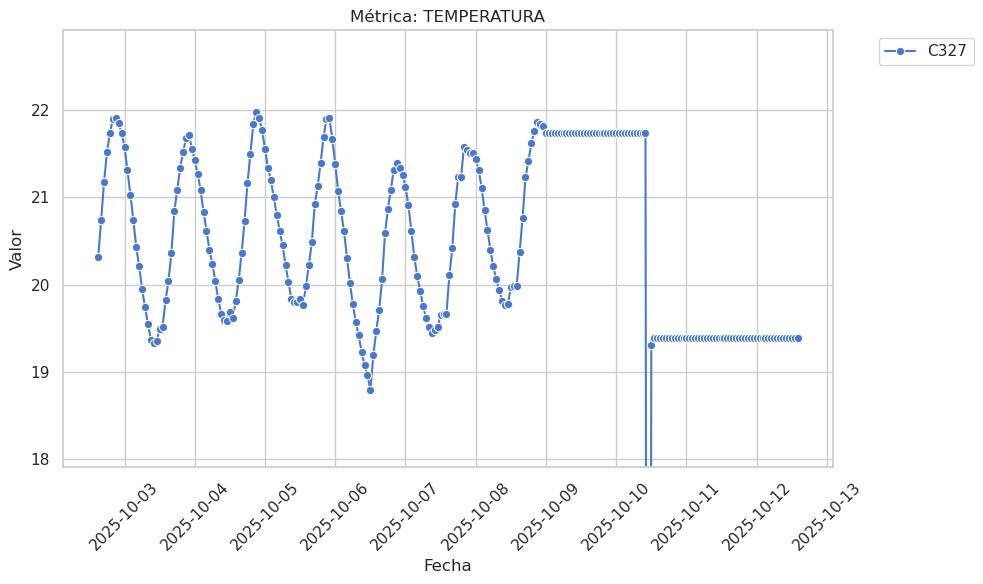

In [66]:
pintar_graficas(df[(df['batch'] == 'batch1') & (df['sensor_id'] == 'C304') & (df['metric'] == 'TEMPERATURA')])
pintar_graficas(df[(df['batch'] == 'batch1') & (df['sensor_id'] == 'C327') & (df['metric'] == 'TEMPERATURA')])

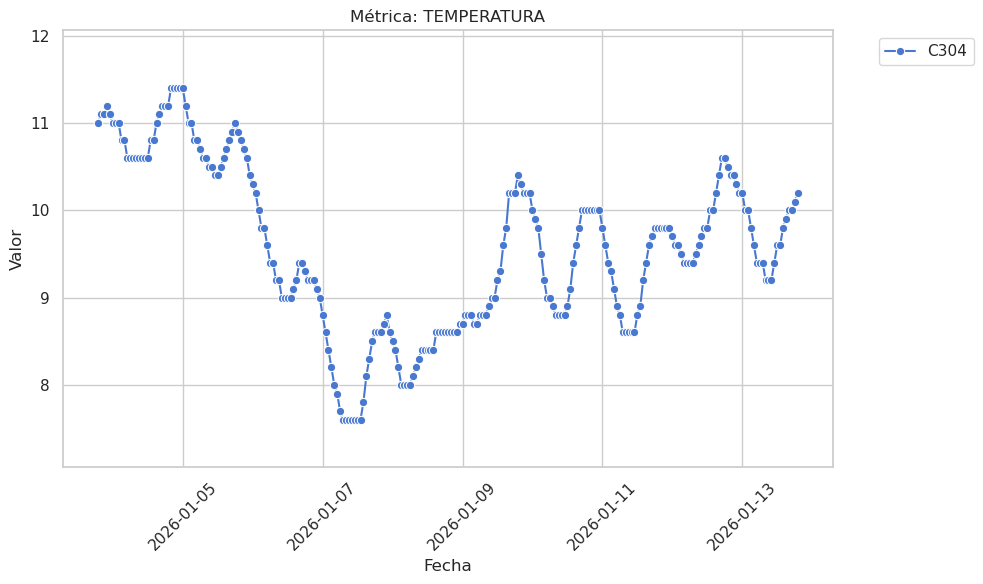

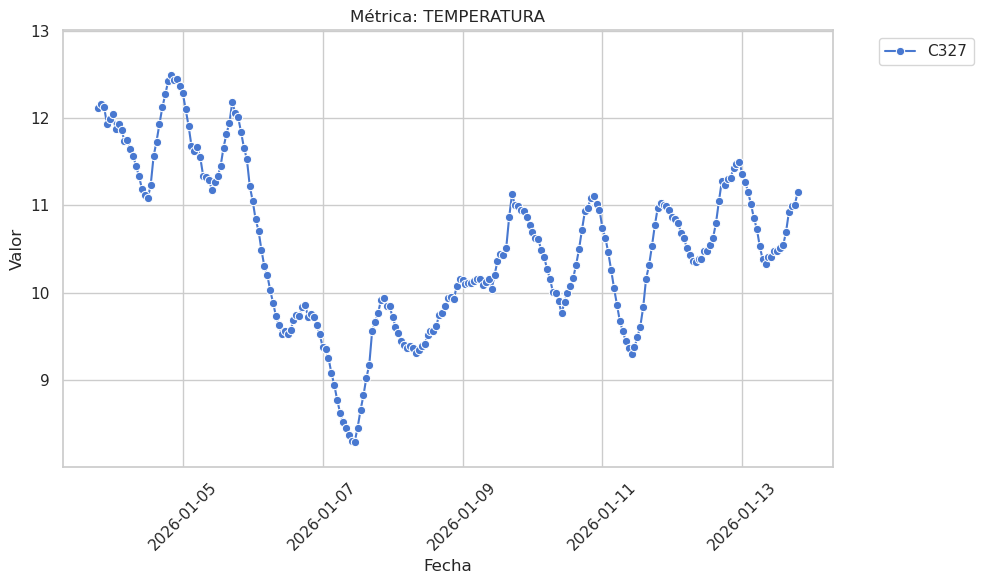

In [67]:
pintar_graficas(df[(df['batch'] == 'batch10') & (df['sensor_id'] == 'C304') & (df['metric'] == 'TEMPERATURA')])
pintar_graficas(df[(df['batch'] == 'batch10') & (df['sensor_id'] == 'C327') & (df['metric'] == 'TEMPERATURA')])

In [72]:
df

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
0,2025-10-02 14:00:00+00:00,7.400000,C323,PH,ph,batch1,7.400000,4.440892e-09
1,2025-10-02 14:00:00+00:00,0.095310,C322,AMONIO,ppm,batch1,0.095310,1.774644e+00
2,2025-10-02 14:00:00+00:00,1.163151,C342,CLOROFILA,µg/l,batch1,1.163151,6.388911e-01
3,2025-10-02 14:00:00+00:00,1.064711,C323,CARBONO ORGANICO,ppm,batch1,1.064711,1.691932e+00
4,2025-10-02 14:00:00+00:00,2.610070,C313,CLOROFILA,ppb,batch1,2.610070,3.181695e+00
...,...,...,...,...,...,...,...,...
278032,2025-12-19 19:00:00+00:00,12.000000,C314,TEMPERATURA,ºC,batch9,12.000000,9.195018e-01
278033,2025-12-19 19:00:00+00:00,0.000000,C308,AMONIO,mg/l,batch9,0.000000,0.000000e+00
278034,2025-12-19 19:00:00+00:00,8.400000,C329,PH,ph,batch9,8.400000,6.869899e-01
278035,2025-12-19 19:00:00+00:00,0.741937,C304,FOSFATOS,ppm,batch9,0.741937,5.747907e-01


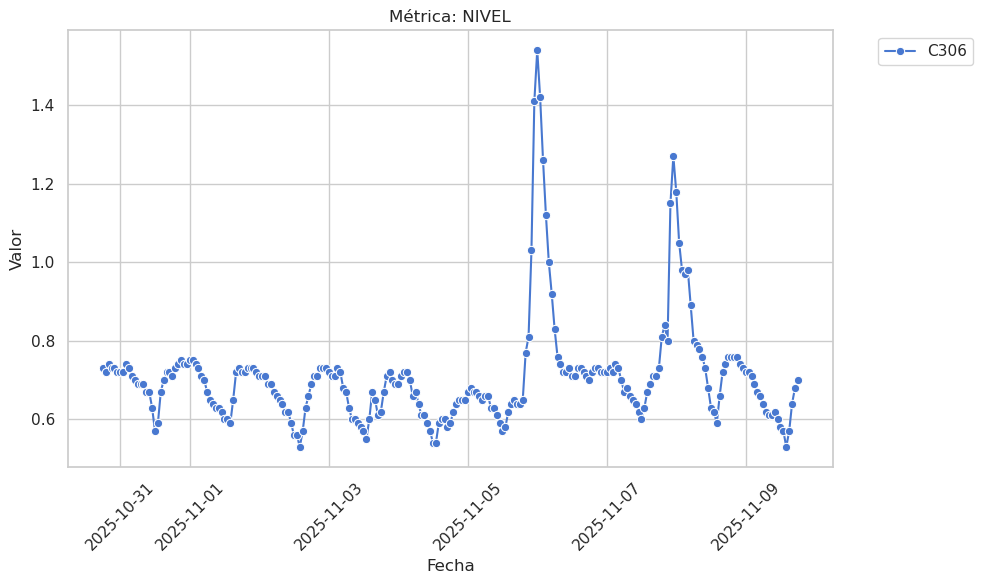

In [77]:
pintar_graficas(df[(df['metric']=='NIVEL') & (df['sensor_id']=='C306') & (df['batch']=='batch2')])

In [ ]:
df[(df['metric']=='NIVEL') & (df['sensor_id']=='C306') & (df['batch']=='batch2')]

In [80]:
df[(df['metric']=='NIVEL') & (df['sensor_id']=='C306') & (df['batch']=='batch2')].sort_values(by='value', ascending=False)

,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
137002,2025-11-06 00:00:00+00:00,1.54,C306,NIVEL,m,batch2,1.54,4.341318
137219,2025-11-06 01:00:00+00:00,1.42,C306,NIVEL,m,batch2,1.42,3.564778
136785,2025-11-05 23:00:00+00:00,1.41,C306,NIVEL,m,batch2,1.41,3.850533
147201,2025-11-07 23:00:00+00:00,1.27,C306,NIVEL,m,batch2,1.27,2.654315
137436,2025-11-06 02:00:00+00:00,1.26,C306,NIVEL,m,batch2,1.26,2.675441
...,...,...,...,...,...,...,...,...
124199,2025-11-03 13:00:00+00:00,0.55,C306,NIVEL,m,batch2,0.55,1.822112
129407,2025-11-04 13:00:00+00:00,0.54,C306,NIVEL,m,batch2,0.54,0.912536
129190,2025-11-04 12:00:00+00:00,0.54,C306,NIVEL,m,batch2,0.54,0.900731
119208,2025-11-02 14:00:00+00:00,0.53,C306,NIVEL,m,batch2,0.53,2.314971


In [82]:
tmp = df[(df['sensor_id']=='C306') & (df['batch']=='batch2')]


tmp['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Define la lista de días que quieres (en formato string 'YYYY-MM-DD')
dias_deseados = ['2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08']

# 3. Filtra usando .dt.date y .isin()
# Convertimos los strings a objetos date para que la comparación sea exacta
import datetime
dias_objetos = [pd.to_datetime(d).date() for d in dias_deseados]

tmp[tmp['timestamp'].dt.date.isin(dias_objetos)]

/tmp/ipykernel_5450/1933020773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['timestamp'] = pd.to_datetime(df['timestamp'])


,timestamp,value,sensor_id,metric,unit,batch,trans_value,z_score_abs
131791,2025-11-05 00:00:00+00:00,20.020000,C306,TEMPERATURA,ºC,batch2,20.020000,0.399246
131794,2025-11-05 00:00:00+00:00,0.670000,C306,NIVEL,m,batch2,0.670000,0.220533
131796,2025-11-05 00:00:00+00:00,2.480731,C306,TURBIDEZ,NTU,batch2,2.480731,0.728645
131808,2025-11-05 00:00:00+00:00,3.970000,C306,OXIGENO DISUELTO,ppm,batch2,3.970000,0.541821
131876,2025-11-05 00:00:00+00:00,6.905723,C306,CONDUCTIVIDAD,micrS/cm,batch2,6.905723,0.513636
...,...,...,...,...,...,...,...,...
152491,2025-11-08 23:00:00+00:00,6.779513,C306,CONDUCTIVIDAD,micrS/cm,batch2,6.779513,0.137220
152528,2025-11-08 23:00:00+00:00,2.388763,C306,CARBONO ORGANICO,ppm,batch2,2.388763,0.117611
152534,2025-11-08 23:00:00+00:00,0.000000,C306,FOSFATOS,ppm,batch2,0.000000,0.000000
152600,2025-11-08 23:00:00+00:00,7.280000,C306,PH,ph,batch2,7.280000,0.327610


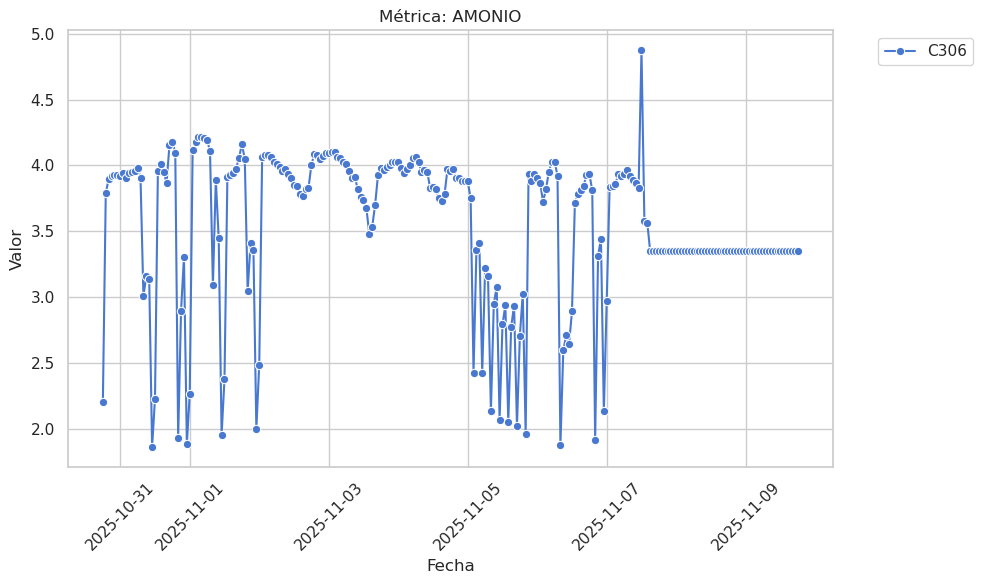

In [83]:
pintar_graficas(tmp[tmp['metric'] == 'AMONIO'])

In [95]:
print(df[(df['sensor_id']=='C306') & (df['batch']=='batch2') & (df['metric']=='AMONIO')]['value'].median())
print(df[(df['sensor_id']=='C306') & (df['batch']=='batch2') & (df['metric']=='AMONIO')]['value'].std())

print(df[(df['sensor_id']=='C330') & (df['batch']=='batch2') & (df['metric']=='AMONIO')]['value'].median())
print(df[(df['sensor_id']=='C330') & (df['batch']=='batch2') & (df['metric']=='AMONIO')]['value'].std())

print(df[(df['sensor_id']=='C333') & (df['batch']=='batch2') & (df['metric']=='AMONIO')]['value'].median())
print(df[(df['sensor_id']=='C333') & (df['batch']=='batch2') & (df['metric']=='AMONIO')]['value'].std())

3.815732345
0.5702799796437849
0.0
0.128657171118155
0.0
0.027270096625601082
